In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglogUKC import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv6 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')


In [3]:
def oset_train(ablation=5000,designated_ukc_cls=3,num_classes=2,embedding_size=128,lr_rate=3,optimizer='sgd',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3):
    tf.random.set_seed(1234)
    np.random.seed(1234) 
    bglog = BGLog(save_padded_num_sequences=False, debug=True,  load_from_pkl=True, )
    train_test = bglog.get_tensor_train_val_test(ablation=ablation, designated_ukc_cls=designated_ukc_cls )
    train_data, val_data, test_data = train_test
    line_encoder = LogLineEncoder(bglog, chars_in_line=64)
    logSeqencer =  LogSeqEncoder(line_in_seq=32, dense_neurons=embedding_size)
    ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=num_classes)
    ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    hist = ptmodel.fit(train_data, validation_data=val_data, epochs=pretrain_epochs)
    oset = OpenSet(num_classes, ptmodel, embedding_size=embedding_size)
    _, _ = oset.train(train_data,data_val=val_data, epochs=octrain_epochs, lr_rate=lr_rate, wait_patient=wait_patient, optimizer=optimizer)
    y_true, y_pred, _ = oset.evaluate(test_data, ukc_label=designated_ukc_cls)
    return test_data, oset

ablation set to : 4000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 3200
val_0:, 400
test_0:, 400
train_1:, 3200
val_1:, 400
test_1:, 400
train_2:, 3200
val_2:, 400
test_2:, 400
902 data in class 3 not enough to split into train:3200 and validation:400, adding the entire data as ukc
class 4 is added as ukc
ukc_4:, 400
165 data in class 5 not enough to split into train:3200 and validation:400, adding the entire data as ukc
75 data in class 6 not enough to split into train:3200 and validation:400, adding the entire data as ukc
train: 0    3200
1    3200
2    3200
Name: label, dtype: int64
val: 0    400
1    400
2    400
Name: label, dtype: int64
test: 0    400
1    400
2    400
4    400
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset elemen

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.56it/s]


epoch: 1/50, train_loss: 3.3325414657592773, eval_score_train: 0.9396682000939105 eval_score_val: 0.9843997159957262


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.58it/s]


epoch: 2/50, train_loss: 3.3325273990631104, eval_score_train: 0.9627642568939079 eval_score_val: 0.9927285219084583


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.53it/s]


epoch: 3/50, train_loss: 3.3324732780456543, eval_score_train: 0.9659552120222679 eval_score_val: 0.9935975993899994


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.55it/s]


epoch: 4/50, train_loss: 3.332534074783325, eval_score_train: 0.9686273971312367 eval_score_val: 0.994892688271832


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.48it/s]


epoch: 5/50, train_loss: 3.332503318786621, eval_score_train: 0.9694340538329783 eval_score_val: 0.9957501632877871


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.51it/s]


epoch: 6/50, train_loss: 3.3324873447418213, eval_score_train: 0.970175495253024 eval_score_val: 0.9974521990275729


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.57it/s]


epoch: 7/50, train_loss: 3.332547426223755, eval_score_train: 0.9712698158750747 eval_score_val: 0.9995771606009091


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.56it/s]


epoch: 8/50, train_loss: 3.33253812789917, eval_score_train: 0.9714540143618382 eval_score_val: 0.9995771688249565


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.57it/s]


epoch: 9/50, train_loss: 3.332494020462036, eval_score_train: 0.9718830827325805 eval_score_val: 0.9995771674716541


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.53it/s]


epoch: 10/50, train_loss: 3.3325209617614746, eval_score_train: 0.9724332490776673 eval_score_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.39it/s]


epoch: 11/50, train_loss: 3.332444190979004, eval_score_train: 0.9726772301410771 eval_score_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.52it/s]


epoch: 12/50, train_loss: 3.3325002193450928, eval_score_train: 0.9729817429021982 eval_score_val: 1.0


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.56it/s]


epoch: 13/50, train_loss: 3.3325161933898926, eval_score_train: 0.9730425837497088 eval_score_val: 1.0


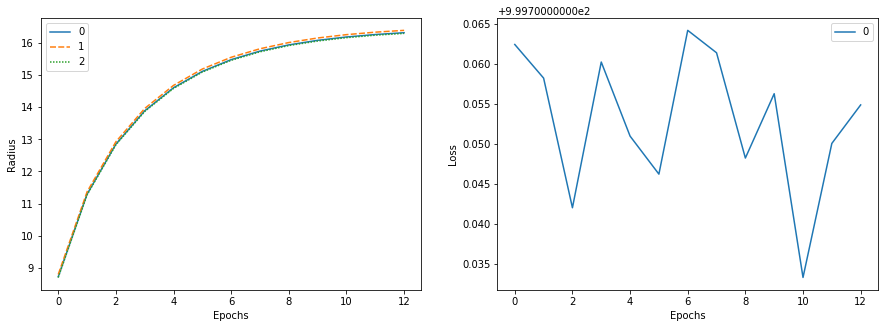

[[400   0   0   0   0]
 [  0 400   0   0   0]
 [  0   0 397   0   3]
 [  0   0 395   0   5]
 [  0   0   0   0   0]]
74.81
f1_weighted: 0.6665268456375838, f1_macro: 0.5332214765100671, f1_micro: 0.7481249999999999, f_measure: {'Known': 66.6527, 'Open': 0, 'F1-score': 53.3221}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       0.50      0.99      0.67       400
           4       0.00      0.00      0.00       400
         999       0.00      0.00      0.00         0

    accuracy                           0.75      1600
   macro avg       0.50      0.60      0.53      1600
weighted avg       0.63      0.75      0.67      1600



In [4]:
test_data, oset = oset_train(ablation=4000,designated_ukc_cls=4,num_classes=3,embedding_size=256,lr_rate=5,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)

In [12]:
_, _, _ = oset.evaluate(test_data, ukc_label=4 )

[[400   0   0   0]
 [  0 400   0   0]
 [  0   0 397   3]
 [  0   0 395   5]]
75.12
f1_weighted: 0.6726542966179759, f1_macro: 0.672654296617976, f1_micro: 0.7512500000000001, f_measure: {'Known': 88.8702, 'Open': 2.451, 'F1-score': 67.2654}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       0.50      0.99      0.67       400
           4       0.62      0.01      0.02       400

    accuracy                           0.75      1600
   macro avg       0.78      0.75      0.67      1600
weighted avg       0.78      0.75      0.67      1600



ablation set to : 3000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 2400
val_0:, 300
test_0:, 300
train_1:, 2400
val_1:, 300
test_1:, 300
train_2:, 2400
val_2:, 300
test_2:, 300
902 data in class 3 not enough to split into train:2400 and validation:300, adding the entire data as ukc
628 data in class 4 not enough to split into train:2400 and validation:300, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2400 and validation:300, adding the entire data as ukc
train: 0    2400
1    2400
2    2400
Name: label, dtype: int64
val: 0    300
1    300
2    300
Name: label, dtype: int64
test: 0    300
1    300
2    300
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.48it/s]


epoch: 1/50, train_loss: 11.619805335998535, eval_score_train: 0.6092237956644736 eval_score_val: 0.6503999748047367


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.47it/s]


epoch: 2/50, train_loss: 11.619805335998535, eval_score_train: 0.62820846128227 eval_score_val: 0.6516287973889029


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.47it/s]


epoch: 3/50, train_loss: 11.6198091506958, eval_score_train: 0.6408900648322553 eval_score_val: 0.6505152301726296


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.43it/s]


epoch: 4/50, train_loss: 11.619794845581055, eval_score_train: 0.6450486729462621 eval_score_val: 0.6506147219432589


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.27it/s]


epoch: 5/50, train_loss: 11.619800567626953, eval_score_train: 0.6485416783276593 eval_score_val: 0.6535489521329365


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.47it/s]


epoch: 6/50, train_loss: 11.619811058044434, eval_score_train: 0.6517740631416024 eval_score_val: 0.6530333157959891


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.45it/s]


epoch: 7/50, train_loss: 11.61980152130127, eval_score_train: 0.6539268833188919 eval_score_val: 0.6541479037267081


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.33it/s]


epoch: 8/50, train_loss: 11.619802474975586, eval_score_train: 0.6550280173357277 eval_score_val: 0.6541479037267081


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.27it/s]


epoch: 9/50, train_loss: 11.619793891906738, eval_score_train: 0.655699611826974 eval_score_val: 0.6552639751552796


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.37it/s]


epoch: 10/50, train_loss: 11.619802474975586, eval_score_train: 0.6565910245280727 eval_score_val: 0.6552669319022945


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.03it/s]


epoch: 11/50, train_loss: 11.619800567626953, eval_score_train: 0.6574778452770733 eval_score_val: 0.6547464037698413


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.34it/s]


epoch: 12/50, train_loss: 11.619808197021484, eval_score_train: 0.6586927569290227 eval_score_val: 0.6553428292894281


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.32it/s]


epoch: 13/50, train_loss: 11.61980152130127, eval_score_train: 0.6589128977200656 eval_score_val: 0.6569812192118227


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.34it/s]


epoch: 14/50, train_loss: 11.619797706604004, eval_score_train: 0.6593523320636996 eval_score_val: 0.6536289820806372


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.26it/s]


epoch: 15/50, train_loss: 11.61980152130127, eval_score_train: 0.6594985597347914 eval_score_val: 0.6542255434782608


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.26it/s]


epoch: 16/50, train_loss: 11.619797706604004, eval_score_train: 0.6596412596091255 eval_score_val: 0.6558638161146811


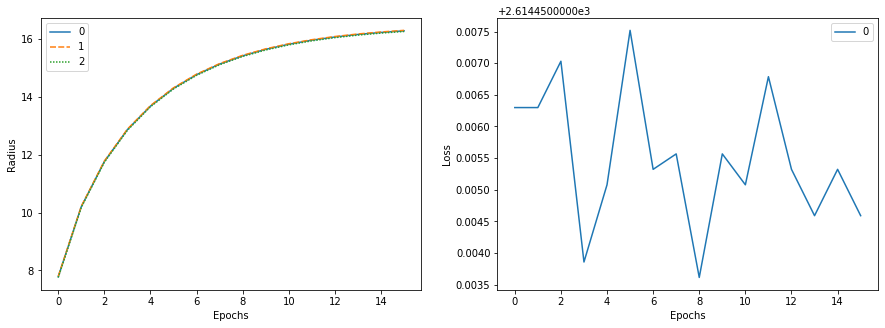

[[296   0   0   0]
 [  0   0   0 299]
 [  0   0 296   0]
 [  2   0   0 163]]
71.5
f1_weighted: 0.6409023112571757, f1_macro: 0.6291423001949318, f1_micro: 0.7149621212121213, f_measure: {'Known': 66.5544, 'Open': 51.9936, 'F1-score': 62.9142}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       296
           1       0.00      0.00      0.00       299
           2       1.00      1.00      1.00       296
           5       0.35      0.99      0.52       165

    accuracy                           0.71      1056
   macro avg       0.59      0.75      0.63      1056
weighted avg       0.61      0.71      0.64      1056



In [14]:
test_data, oset = oset_train(ablation=3000,designated_ukc_cls=5,num_classes=3,embedding_size=256,lr_rate=5,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)

ablation set to : 3000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 2400
val_0:, 300
test_0:, 300
train_1:, 2400
val_1:, 300
test_1:, 300
train_2:, 2400
val_2:, 300
test_2:, 300
902 data in class 3 not enough to split into train:2400 and validation:300, adding the entire data as ukc
628 data in class 4 not enough to split into train:2400 and validation:300, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2400 and validation:300, adding the entire data as ukc
train: 0    2400
1    2400
2    2400
Name: label, dtype: int64
val: 0    300
1    300
2    300
Name: label, dtype: int64
test: 0    300
1    300
2    300
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.33it/s]


epoch: 1/50, train_loss: 2.670550584793091, eval_score_train: 0.9377217206513303 eval_score_val: 0.988454433497537


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.31it/s]


epoch: 2/50, train_loss: 2.67046856880188, eval_score_train: 0.9426772000363993 eval_score_val: 0.988454433497537


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.23it/s]


epoch: 3/50, train_loss: 2.6706411838531494, eval_score_train: 0.944612133135007 eval_score_val: 0.9890481864322852


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.39it/s]


epoch: 4/50, train_loss: 2.6706244945526123, eval_score_train: 0.9458975930513455 eval_score_val: 0.9896436268472907


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.36it/s]


epoch: 5/50, train_loss: 2.670597791671753, eval_score_train: 0.9466696508595182 eval_score_val: 0.9896436268472907


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.40it/s]


epoch: 6/50, train_loss: 2.6706185340881348, eval_score_train: 0.9469948824481358 eval_score_val: 0.9896446980854198


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.39it/s]


epoch: 7/50, train_loss: 2.6705446243286133, eval_score_train: 0.9477073520305785 eval_score_val: 0.9896425481957489


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.36it/s]


epoch: 8/50, train_loss: 2.670536518096924, eval_score_train: 0.9478903228976712 eval_score_val: 0.9896425481957489


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.32it/s]


epoch: 9/50, train_loss: 2.670638084411621, eval_score_train: 0.9481644513718641 eval_score_val: 0.9896436268472907


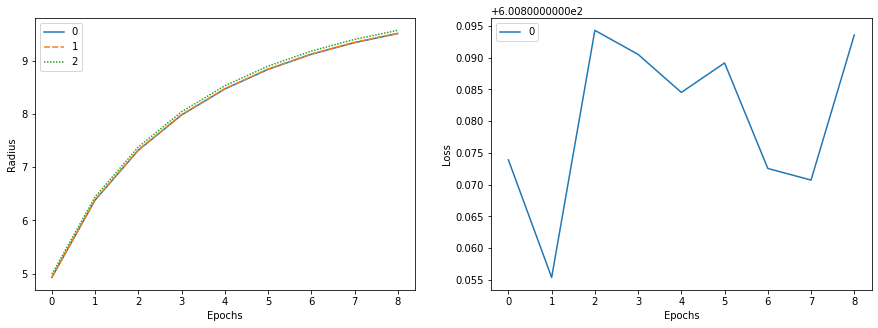

[[295   0   0   0]
 [  0 296   0   0]
 [  0   0 300   0]
 [ 80   0   0  85]]
92.42
f1_weighted: 0.9166440524649478, f1_macro: 0.8901492537313433, f1_micro: 0.9242424242424242, f_measure: {'Known': 96.0199, 'Open': 68.0, 'F1-score': 89.0149}
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       295
           1       1.00      1.00      1.00       296
           2       1.00      1.00      1.00       300
           5       1.00      0.52      0.68       165

    accuracy                           0.92      1056
   macro avg       0.95      0.88      0.89      1056
weighted avg       0.94      0.92      0.92      1056



In [16]:
test_data, oset = oset_train(ablation=3000,designated_ukc_cls=5,num_classes=3,embedding_size=8,lr_rate=3,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)

ablation set to : 3000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 2400
val_0:, 300
test_0:, 300
train_1:, 2400
val_1:, 300
test_1:, 300
train_2:, 2400
val_2:, 300
test_2:, 300
902 data in class 3 not enough to split into train:2400 and validation:300, adding the entire data as ukc
628 data in class 4 not enough to split into train:2400 and validation:300, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2400 and validation:300, adding the entire data as ukc
train: 0    2400
1    2400
2    2400
Name: label, dtype: int64
val: 0    300
1    300
2    300
Name: label, dtype: int64
test: 0    300
1    300
2    300
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.22it/s]


epoch: 1/50, train_loss: 2.670550584793091, eval_score_train: 0.6469993595284306 eval_score_val: 0.656383003330866


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.43it/s]


epoch: 2/50, train_loss: 2.67046856880188, eval_score_train: 0.9341162934814932 eval_score_val: 0.988454433497537


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.07it/s]


epoch: 3/50, train_loss: 2.6706411838531494, eval_score_train: 0.938490333596773 eval_score_val: 0.9884517609126985


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.13it/s]


epoch: 4/50, train_loss: 2.6706244945526123, eval_score_train: 0.939863178430692 eval_score_val: 0.988453101828967


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.12it/s]


epoch: 5/50, train_loss: 2.670597791671753, eval_score_train: 0.940970614745676 eval_score_val: 0.988453101828967


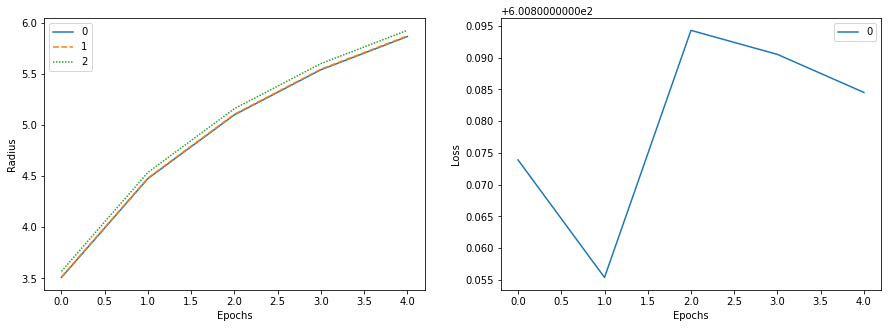

[[295   0   0   0]
 [  0 296   0   0]
 [  0   0 300   0]
 [  7   0   0 158]]
99.34
f1_weighted: 0.9933382453908847, f1_macro: 0.9916507200605711, f1_micro: 0.9933712121212122, f_measure: {'Known': 99.6092, 'Open': 97.8328, 'F1-score': 99.1651}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       295
           1       1.00      1.00      1.00       296
           2       1.00      1.00      1.00       300
           5       1.00      0.96      0.98       165

    accuracy                           0.99      1056
   macro avg       0.99      0.99      0.99      1056
weighted avg       0.99      0.99      0.99      1056



In [17]:
test_data, oset = oset_train(ablation=3000,designated_ukc_cls=5,num_classes=3,embedding_size=8,lr_rate=2,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)

ablation set to : 3000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 2400
val_0:, 300
test_0:, 300
train_1:, 2400
val_1:, 300
test_1:, 300
train_2:, 2400
val_2:, 300
test_2:, 300
902 data in class 3 not enough to split into train:2400 and validation:300, adding the entire data as ukc
628 data in class 4 not enough to split into train:2400 and validation:300, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2400 and validation:300, adding the entire data as ukc
train: 0    2400
1    2400
2    2400
Name: label, dtype: int64
val: 0    300
1    300
2    300
Name: label, dtype: int64
test: 0    300
1    300
2    300
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.38it/s]


epoch: 1/50, train_loss: 2.670550584793091, eval_score_train: 0.4801456501098248 eval_score_val: 0.3553067396313364


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.29it/s]


epoch: 2/50, train_loss: 2.67046856880188, eval_score_train: 0.6301692588564678 eval_score_val: 0.6516337883320867


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.49it/s]


epoch: 3/50, train_loss: 2.6706411838531494, eval_score_train: 0.6361065753315545 eval_score_val: 0.653455919080919


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:31<00:00,  7.18it/s]


epoch: 4/50, train_loss: 2.6706244945526123, eval_score_train: 0.6401179539959164 eval_score_val: 0.6535489521329365


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.49it/s]


epoch: 5/50, train_loss: 2.670597791671753, eval_score_train: 0.6431260594449209 eval_score_val: 0.6535489521329365


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.49it/s]


epoch: 6/50, train_loss: 2.6706185340881348, eval_score_train: 0.645264610577693 eval_score_val: 0.6546666460701928


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.36it/s]


epoch: 7/50, train_loss: 2.6705446243286133, eval_score_train: 0.6468439017558139 eval_score_val: 0.6552639751552796


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.47it/s]


epoch: 8/50, train_loss: 2.670536518096924, eval_score_train: 0.6480441501125431 eval_score_val: 0.6541479037267081


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.50it/s]


epoch: 9/50, train_loss: 2.670638084411621, eval_score_train: 0.6484233518603595 eval_score_val: 0.655265458653132


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.58it/s]


epoch: 10/50, train_loss: 2.670579671859741, eval_score_train: 0.6495337422383411 eval_score_val: 0.655265458653132


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.57it/s]


epoch: 11/50, train_loss: 2.6706390380859375, eval_score_train: 0.6497503163977505 eval_score_val: 0.6558624751984128


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.58it/s]


epoch: 12/50, train_loss: 2.6706221103668213, eval_score_train: 0.6498272125536252 eval_score_val: 0.6541479037267081


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.50it/s]


epoch: 13/50, train_loss: 2.6707117557525635, eval_score_train: 0.37145160646902053 eval_score_val: 0.33702390840056956


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.29it/s]


epoch: 14/50, train_loss: 2.670644521713257, eval_score_train: 0.6505109487070792 eval_score_val: 0.6564601067110782


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.55it/s]


epoch: 15/50, train_loss: 2.6705822944641113, eval_score_train: 0.6505109487070792 eval_score_val: 0.6536303323412699


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.56it/s]


epoch: 16/50, train_loss: 2.6706035137176514, eval_score_train: 0.650733851693857 eval_score_val: 0.6547464037698413


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.59it/s]


epoch: 17/50, train_loss: 2.670659065246582, eval_score_train: 0.650880098466398 eval_score_val: 0.6547490763546798


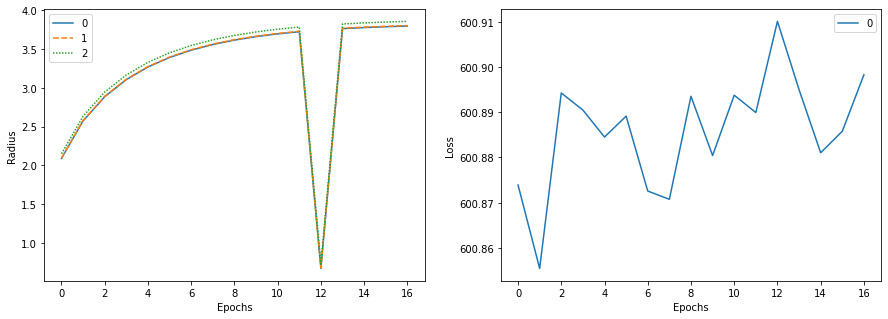

[[295   0   0   0]
 [  0   0   0 296]
 [  0   0 300   0]
 [  0   0   0 165]]
71.97
f1_weighted: 0.6458151805595894, f1_macro: 0.6317891373801917, f1_micro: 0.7196969696969698, f_measure: {'Known': 66.6667, 'Open': 52.7157, 'F1-score': 63.1789}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       0.00      0.00      0.00       296
           2       1.00      1.00      1.00       300
           5       0.36      1.00      0.53       165

    accuracy                           0.72      1056
   macro avg       0.59      0.75      0.63      1056
weighted avg       0.62      0.72      0.65      1056



In [18]:
test_data, oset = oset_train(ablation=3000,designated_ukc_cls=5,num_classes=3,embedding_size=8,lr_rate=1,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)

ablation set to : 3000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 2400
val_0:, 300
test_0:, 300
train_1:, 2400
val_1:, 300
test_1:, 300
train_2:, 2400
val_2:, 300
test_2:, 300
902 data in class 3 not enough to split into train:2400 and validation:300, adding the entire data as ukc
628 data in class 4 not enough to split into train:2400 and validation:300, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2400 and validation:300, adding the entire data as ukc
train: 0    2400
1    2400
2    2400
Name: label, dtype: int64
val: 0    300
1    300
2    300
Name: label, dtype: int64
test: 0    300
1    300
2    300
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.45it/s]


epoch: 1/50, train_loss: 3.2178800106048584, eval_score_train: 0.5434215648917933 eval_score_val: 0.6484138377082281


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.47it/s]


epoch: 2/50, train_loss: 3.2177364826202393, eval_score_train: 0.560020735380136 eval_score_val: 0.6510208541458541


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.48it/s]


epoch: 3/50, train_loss: 3.2179598808288574, eval_score_train: 0.5642555765798045 eval_score_val: 0.6528490117588192


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.46it/s]


epoch: 4/50, train_loss: 3.2179293632507324, eval_score_train: 0.5717477317935734 eval_score_val: 0.6529464285714285


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.49it/s]


epoch: 5/50, train_loss: 3.2179205417633057, eval_score_train: 0.573382802989664 eval_score_val: 0.6541493872245605


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.49it/s]


epoch: 6/50, train_loss: 3.2178988456726074, eval_score_train: 0.5751617501529239 eval_score_val: 0.6558651477832512


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.28it/s]


epoch: 7/50, train_loss: 3.217872142791748, eval_score_train: 0.5759378304252912 eval_score_val: 0.6558624751984128


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.54it/s]


epoch: 8/50, train_loss: 3.2178425788879395, eval_score_train: 0.5772298964953129 eval_score_val: 0.6547464037698413


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.57it/s]


epoch: 9/50, train_loss: 3.2179718017578125, eval_score_train: 0.5789536382883838 eval_score_val: 0.6558638161146811


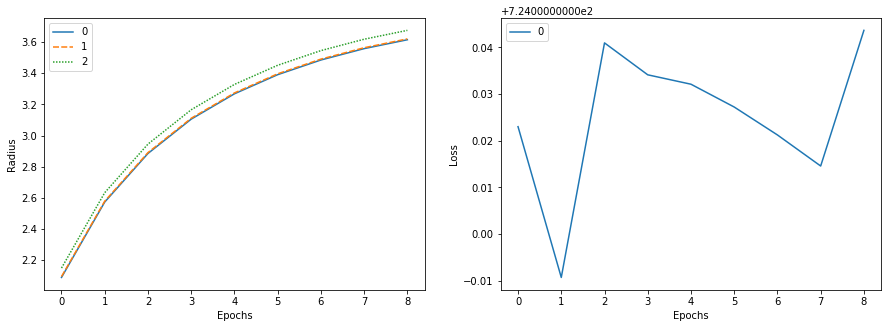

[[295   0   0   0]
 [  0   0   0 296]
 [  0   0 300   0]
 [  0   0   0 165]]
71.97
f1_weighted: 0.6458151805595894, f1_macro: 0.6317891373801917, f1_micro: 0.7196969696969698, f_measure: {'Known': 66.6667, 'Open': 52.7157, 'F1-score': 63.1789}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       0.00      0.00      0.00       296
           2       1.00      1.00      1.00       300
           5       0.36      1.00      0.53       165

    accuracy                           0.72      1056
   macro avg       0.59      0.75      0.63      1056
weighted avg       0.62      0.72      0.65      1056



In [19]:
test_data, oset = oset_train(ablation=3000,designated_ukc_cls=5,num_classes=3,embedding_size=4,lr_rate=1,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)

ablation set to : 3000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 2400
val_0:, 300
test_0:, 300
train_1:, 2400
val_1:, 300
test_1:, 300
train_2:, 2400
val_2:, 300
test_2:, 300
902 data in class 3 not enough to split into train:2400 and validation:300, adding the entire data as ukc
628 data in class 4 not enough to split into train:2400 and validation:300, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2400 and validation:300, adding the entire data as ukc
train: 0    2400
1    2400
2    2400
Name: label, dtype: int64
val: 0    300
1    300
2    300
Name: label, dtype: int64
test: 0    300
1    300
2    300
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.30it/s]


epoch: 1/50, train_loss: 3.2178800106048584, F1_train: 0.5619675310915562 F1_val: 0.6533606582877053


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.26it/s]


epoch: 2/50, train_loss: 3.2177364826202393, F1_train: 0.5767817434913958 F1_val: 0.6558651477832512


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.31it/s]


epoch: 3/50, train_loss: 3.2179598808288574, F1_train: 0.5855626186308863 F1_val: 0.6558624751984128


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.37it/s]


epoch: 4/50, train_loss: 3.2179293632507324, F1_train: 0.587991409182871 F1_val: 0.6547477446861097


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.66it/s]


epoch: 5/50, train_loss: 3.2179205417633057, F1_train: 0.5904608544974007 F1_val: 0.6553440352825068


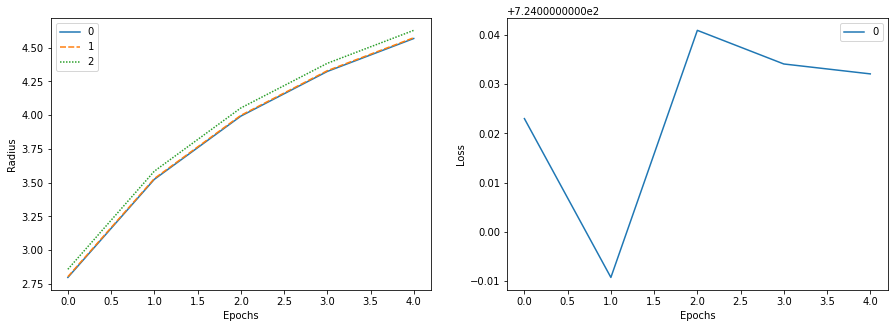

[[295   0   0   0]
 [  0   0   0 296]
 [  0   0 300   0]
 [  0   0   0 165]]
71.97
f1_weighted: 0.6458151805595894, f1_macro: 0.6317891373801917, f1_micro: 0.7196969696969698, f_measure: {'Known': 66.6667, 'Open': 52.7157, 'F1-score': 63.1789}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       0.00      0.00      0.00       296
           2       1.00      1.00      1.00       300
           5       0.36      1.00      0.53       165

    accuracy                           0.72      1056
   macro avg       0.59      0.75      0.63      1056
weighted avg       0.62      0.72      0.65      1056



In [4]:
test_data, oset = oset_train(ablation=3000,designated_ukc_cls=5,num_classes=3,embedding_size=4,lr_rate=1.5,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)

ablation set to : 3000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 2400
val_0:, 300
test_0:, 300
train_1:, 2400
val_1:, 300
test_1:, 300
train_2:, 2400
val_2:, 300
test_2:, 300
902 data in class 3 not enough to split into train:2400 and validation:300, adding the entire data as ukc
628 data in class 4 not enough to split into train:2400 and validation:300, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2400 and validation:300, adding the entire data as ukc
train: 0    2400
1    2400
2    2400
Name: label, dtype: int64
val: 0    300
1    300
2    300
Name: label, dtype: int64
test: 0    300
1    300
2    300
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.41it/s]


epoch: 1/50, train_loss: 3.2178800106048584, F1_train: 0.5619675310915562 F1_val: 0.6533606582877053


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.50it/s]


epoch: 2/50, train_loss: 3.2177364826202393, F1_train: 0.5767817434913958 F1_val: 0.6558651477832512


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.54it/s]


epoch: 3/50, train_loss: 3.2179598808288574, F1_train: 0.5855626186308863 F1_val: 0.6558624751984128


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.53it/s]


epoch: 4/50, train_loss: 3.2179293632507324, F1_train: 0.587991409182871 F1_val: 0.6547477446861097


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.53it/s]


epoch: 5/50, train_loss: 3.2179205417633057, F1_train: 0.5904608544974007 F1_val: 0.6553440352825068


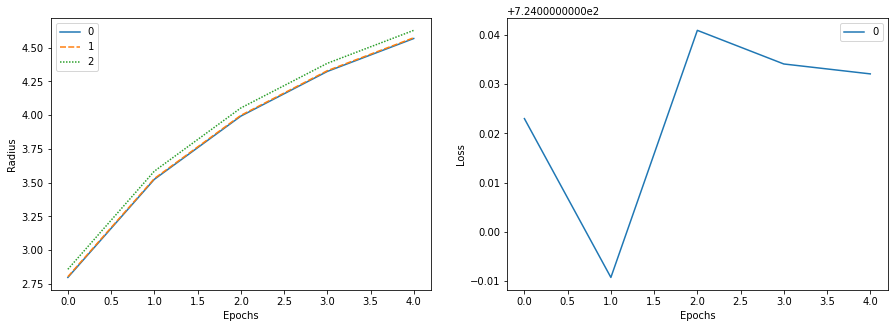

[[295   0   0   0]
 [  0   0   0 296]
 [  0   0 300   0]
 [  0   0   0 165]]
71.97
f1_weighted: 0.6458151805595894, f1_macro: 0.6317891373801917, f1_micro: 0.7196969696969698, f_measure: {'Known': 66.6667, 'Open': 52.7157, 'F1-score': 63.1789}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       0.00      0.00      0.00       296
           2       1.00      1.00      1.00       300
           5       0.36      1.00      0.53       165

    accuracy                           0.72      1056
   macro avg       0.59      0.75      0.63      1056
weighted avg       0.62      0.72      0.65      1056



In [5]:
test_data, oset = oset_train(ablation=3000,designated_ukc_cls=5,num_classes=3,embedding_size=4,lr_rate=2,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)

ablation set to : 3000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 2400
val_0:, 300
test_0:, 300
train_1:, 2400
val_1:, 300
test_1:, 300
train_2:, 2400
val_2:, 300
test_2:, 300
902 data in class 3 not enough to split into train:2400 and validation:300, adding the entire data as ukc
628 data in class 4 not enough to split into train:2400 and validation:300, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:2400 and validation:300, adding the entire data as ukc
train: 0    2400
1    2400
2    2400
Name: label, dtype: int64
val: 0    300
1    300
2    300
Name: label, dtype: int64
test: 0    300
1    300
2    300
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.50it/s]


epoch: 1/50, train_loss: 3.2178800106048584, F1_train: 0.5763955595095765 F1_val: 0.6569812192118227


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.38it/s]


epoch: 2/50, train_loss: 3.2177364826202393, F1_train: 0.5896426858872215 F1_val: 0.6558651477832512


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.54it/s]


epoch: 3/50, train_loss: 3.2179598808288574, F1_train: 0.8708357779103277 F1_val: 0.9890481864322852


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.54it/s]


epoch: 4/50, train_loss: 3.2179293632507324, F1_train: 0.8783689353603676 F1_val: 0.9890493924253639


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.53it/s]


epoch: 5/50, train_loss: 3.2179205417633057, F1_train: 0.8846699781077865 F1_val: 0.9896436268472907


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.53it/s]


epoch: 6/50, train_loss: 3.2178988456726074, F1_train: 0.8899480086006554 F1_val: 0.9896446980854198


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:30<00:00,  7.48it/s]


epoch: 7/50, train_loss: 3.217872142791748, F1_train: 0.8935948219889495 F1_val: 0.9896425481957489


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.54it/s]


epoch: 8/50, train_loss: 3.2178425788879395, F1_train: 0.8961837554922749 F1_val: 0.9896425481957489


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [00:29<00:00,  7.54it/s]


epoch: 9/50, train_loss: 3.2179718017578125, F1_train: 0.8982148628242954 F1_val: 0.9896436268472907


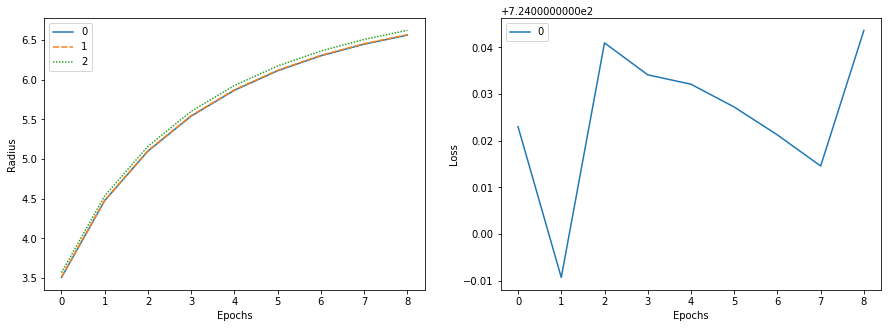

[[295   0   0   0]
 [  0 296   0   0]
 [  0   0 300   0]
 [  0   0   0 165]]
100.0
f1_weighted: 1.0, f1_macro: 1.0, f1_micro: 1.0, f_measure: {'Known': 100.0, 'Open': 100.0, 'F1-score': 100.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       1.00      1.00      1.00       296
           2       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       165

    accuracy                           1.00      1056
   macro avg       1.00      1.00      1.00      1056
weighted avg       1.00      1.00      1.00      1056



In [6]:
test_data, oset = oset_train(ablation=3000,designated_ukc_cls=5,num_classes=3,embedding_size=4,lr_rate=2,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)

ablation set to : 4000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 3200
val_0:, 400
test_0:, 400
train_1:, 3200
val_1:, 400
test_1:, 400
train_2:, 3200
val_2:, 400
test_2:, 400
902 data in class 3 not enough to split into train:3200 and validation:400, adding the entire data as ukc
628 data in class 4 not enough to split into train:3200 and validation:400, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:3200 and validation:400, adding the entire data as ukc
train: 0    3200
1    3200
2    3200
Name: label, dtype: int64
val: 0    400
1    400
2    400
Name: label, dtype: int64
test: 0    400
1    400
2    400
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.62it/s]


epoch: 1/50, train_loss: 13.734349250793457, F1_train: 0.6417011524405442 F1_val: 0.4072336863890918


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.62it/s]


epoch: 2/50, train_loss: 13.734354019165039, F1_train: 0.6519143463762457 F1_val: 0.6481578321425192


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.62it/s]


epoch: 3/50, train_loss: 13.734261512756348, F1_train: 0.6529762761897949 F1_val: 0.6524799956854247


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.64it/s]


epoch: 4/50, train_loss: 13.734308242797852, F1_train: 0.6536613070884602 F1_val: 0.6555589344010029


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.66it/s]


epoch: 5/50, train_loss: 13.734299659729004, F1_train: 0.6547551141243074 F1_val: 0.6534919899738447


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.66it/s]


epoch: 6/50, train_loss: 13.734333992004395, F1_train: 0.654916933274238 F1_val: 0.6568776958776958


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.52it/s]


epoch: 7/50, train_loss: 13.73430347442627, F1_train: 0.6553475078150999 F1_val: 0.6586165420610771


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.66it/s]


epoch: 8/50, train_loss: 13.734267234802246, F1_train: 0.6554595853056169 F1_val: 0.6590960712376909


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.66it/s]


epoch: 9/50, train_loss: 13.734366416931152, F1_train: 0.6562918284575592 F1_val: 0.6570229774811821


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.66it/s]


epoch: 10/50, train_loss: 13.73433780670166, F1_train: 0.6562918284575592 F1_val: 0.6578715992778493


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.66it/s]


epoch: 11/50, train_loss: 13.734257698059082, F1_train: 0.6562918284575592 F1_val: 0.6595559674631063


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.65it/s]


epoch: 12/50, train_loss: 13.734267234802246, F1_train: 0.6563478218170267 F1_val: 0.6587073024282777


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.66it/s]


epoch: 13/50, train_loss: 13.734326362609863, F1_train: 0.6563478218170267 F1_val: 0.6574884131555823


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.57it/s]


epoch: 14/50, train_loss: 13.73421859741211, F1_train: 0.6564037970380558 F1_val: 0.6587116387954505


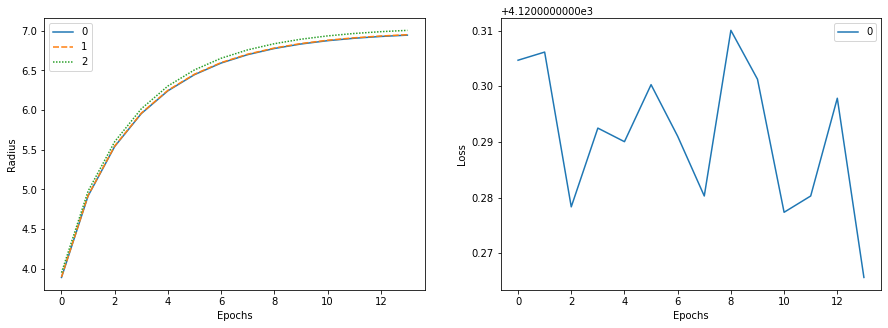

[[379   0   0  17]
 [  0 392   0   0]
 [  0   0   3 390]
 [  0   2   0 161]]
69.57
f1_weighted: 0.6369575237862468, f1_macro: 0.6077909945196631, f1_micro: 0.6956845238095238, f_measure: {'Known': 66.3557, 'Open': 44.0492, 'F1-score': 60.7791}
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       396
           1       0.99      1.00      1.00       392
           2       1.00      0.01      0.02       393
           5       0.28      0.99      0.44       163

    accuracy                           0.70      1344
   macro avg       0.82      0.74      0.61      1344
weighted avg       0.91      0.70      0.64      1344



In [7]:
test_data, oset = oset_train(ablation=4000,designated_ukc_cls=5,num_classes=3,embedding_size=2,lr_rate=2,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)

ablation set to : 4000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 3200
val_0:, 400
test_0:, 400
train_1:, 3200
val_1:, 400
test_1:, 400
train_2:, 3200
val_2:, 400
test_2:, 400
902 data in class 3 not enough to split into train:3200 and validation:400, adding the entire data as ukc
628 data in class 4 not enough to split into train:3200 and validation:400, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:3200 and validation:400, adding the entire data as ukc
train: 0    3200
1    3200
2    3200
Name: label, dtype: int64
val: 0    400
1    400
2    400
Name: label, dtype: int64
test: 0    400
1    400
2    400
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:38<00:00,  7.76it/s]


epoch: 1/50, train_loss: 0.6910173892974854, F1_train: 0.0 F1_val: 0.0


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:38<00:00,  7.78it/s]


epoch: 2/50, train_loss: 0.6910170316696167, F1_train: 0.0 F1_val: 0.0


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:38<00:00,  7.78it/s]


epoch: 3/50, train_loss: 0.6910173296928406, F1_train: 0.0 F1_val: 0.0


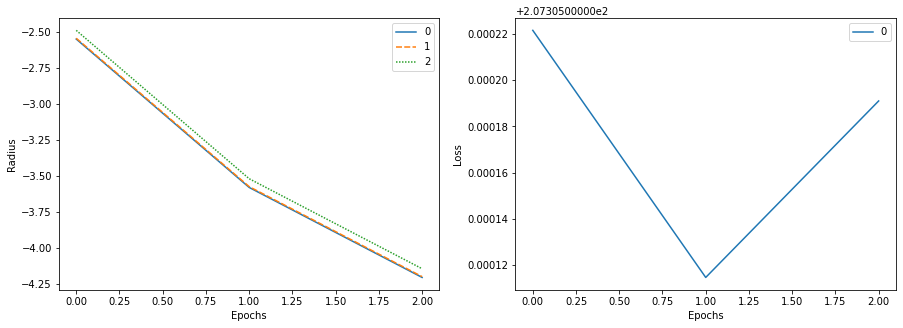

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [8]:
test_data, oset = oset_train(ablation=4000,designated_ukc_cls=5,num_classes=3,embedding_size=1,lr_rate=2,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)

ablation set to : 4000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltkukc.pkl
train_0:, 3200
val_0:, 400
test_0:, 400
train_1:, 3200
val_1:, 400
test_1:, 400
train_2:, 3200
val_2:, 400
test_2:, 400
902 data in class 3 not enough to split into train:3200 and validation:400, adding the entire data as ukc
628 data in class 4 not enough to split into train:3200 and validation:400, adding the entire data as ukc
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:3200 and validation:400, adding the entire data as ukc
train: 0    3200
1    3200
2    3200
Name: label, dtype: int64
val: 0    400
1    400
2    400
Name: label, dtype: int64
test: 0    400
1    400
2    400
5    165
Name: label, dtype: int64
[[1. 0. 0.]
 [1. 0. 0.]]
some example of labels:
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]
<BatchDataset 

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.37it/s]


epoch: 1/50, train_loss: 8.167481422424316, F1_train: 0.3354057033802615 F1_val: 0.32930055928781815


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:43<00:00,  6.95it/s]


epoch: 2/50, train_loss: 8.167460441589355, F1_train: 0.3385535282587024 F1_val: 0.33220570509097824


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:41<00:00,  7.27it/s]


epoch: 3/50, train_loss: 8.167381286621094, F1_train: 0.34540140773572003 F1_val: 0.34043859404996407


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:41<00:00,  7.29it/s]


epoch: 4/50, train_loss: 8.16744613647461, F1_train: 0.3519889915154619 F1_val: 0.3430173214180567


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.32it/s]


epoch: 5/50, train_loss: 8.167471885681152, F1_train: 0.3532313208435836 F1_val: 0.34179223135078546


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:41<00:00,  7.26it/s]


epoch: 6/50, train_loss: 8.167469024658203, F1_train: 0.35558953428690177 F1_val: 0.3452389720014112


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:41<00:00,  7.30it/s]


epoch: 7/50, train_loss: 8.167396545410156, F1_train: 0.3561972151331018 F1_val: 0.34270323900546434


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.37it/s]


epoch: 8/50, train_loss: 8.167389869689941, F1_train: 0.35658664814814367 F1_val: 0.34693323838544426


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.32it/s]


epoch: 9/50, train_loss: 8.16745662689209, F1_train: 0.648664392263271 F1_val: 0.6767846319475449


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.40it/s]


epoch: 10/50, train_loss: 8.167458534240723, F1_train: 0.648664392263271 F1_val: 0.6771728784133685


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.34it/s]


epoch: 11/50, train_loss: 8.167405128479004, F1_train: 0.648664392263271 F1_val: 0.677283602371734


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:41<00:00,  7.18it/s]


epoch: 12/50, train_loss: 8.167366981506348, F1_train: 0.648664392263271 F1_val: 0.6780095706589212


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.45it/s]


epoch: 13/50, train_loss: 8.1674165725708, F1_train: 0.6488588149566766 F1_val: 0.6767846319475449


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.44it/s]


epoch: 14/50, train_loss: 8.167327880859375, F1_train: 0.6488588149566766 F1_val: 0.6780124034396119


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.45it/s]


epoch: 15/50, train_loss: 8.167439460754395, F1_train: 0.6488588149566766 F1_val: 0.6746416125152439


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.45it/s]


epoch: 16/50, train_loss: 8.167353630065918, F1_train: 0.6488588149566766 F1_val: 0.676439588920648


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.45it/s]


epoch: 17/50, train_loss: 8.167428970336914, F1_train: 0.6488588149566766 F1_val: 0.6788575235139928


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:40<00:00,  7.43it/s]


epoch: 18/50, train_loss: 8.167473793029785, F1_train: 0.6488588149566766 F1_val: 0.6780152065188011


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.55it/s]


epoch: 19/50, train_loss: 8.167424201965332, F1_train: 0.6488588149566766 F1_val: 0.6763249034189117


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:39<00:00,  7.55it/s]


epoch: 20/50, train_loss: 8.167445182800293, F1_train: 0.6488588149566766 F1_val: 0.6771700753341793


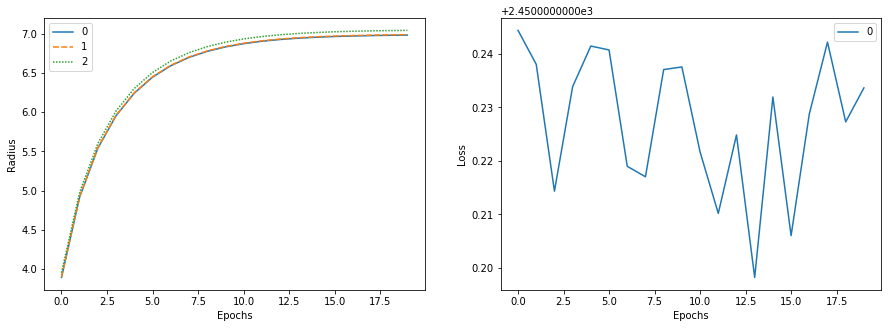

[[386   0   0  10]
 [  0 392   0   0]
 [  0   0  18 375]
 [  0   0   0 163]]
71.35
f1_weighted: 0.6637622092262049, f1_macro: 0.6333281647860479, f1_micro: 0.7135416666666666, f_measure: {'Known': 69.1601, 'Open': 45.8509, 'F1-score': 63.3328}
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       396
           1       1.00      1.00      1.00       392
           2       1.00      0.05      0.09       393
           5       0.30      1.00      0.46       163

    accuracy                           0.71      1344
   macro avg       0.82      0.76      0.63      1344
weighted avg       0.91      0.71      0.66      1344



In [9]:
test_data, oset = oset_train(ablation=4000,designated_ukc_cls=5,num_classes=3,embedding_size=4,lr_rate=2,optimizer='adam',
pretrain_epochs=3,octrain_epochs=50,wait_patient=3)